#Question one answer：

A classification model is an algorithm designed to assign data to specific categories, addressing **discrete output problems**. Its process resembles progressively narrowing down possibilities: each step uses feature-based decisions to eliminate unlikely categories until the data's category is confirmed. For example, in a classification decision tree, the model asks sequential questions like “Is the income greater than 50k?” followed by “Is the age over 30?”, systematically pinpointing the final category. Classification models are intuitive, easy to interpret, and widely used in applications such as spam detection, medical diagnosis, and customer segmentation.

The difference between a classification decision tree and linear regression lies in their **task types** and **model structures**. Classification decision trees solve **classification problems**, producing discrete outputs by following a tree-like structure of feature-based rules to determine categories, making them highly interpretable. In contrast, linear regression tackles **regression problems**, predicting continuous values (e.g., house prices or temperatures). It uses a mathematical formula to calculate a weighted sum of input features based on their linear relationships, outputting a numeric prediction. These two models serve distinct purposes and are applied in different scenarios, each excelling in its respective domain.

Most important, the dependent variables y of the decision trees has to be yes or no, and x can be continous. However, multiple linear regression y has to be continous variable.


### Summary of Interactions on Classification Decision Trees and Regression：https://chatgpt.com/share/673f2f09-4a30-800d-8d30-f448fd628b25

1. **Classification Decision Tree Overview**:
   - We discussed the type of problems a Classification Decision Tree addresses, such as predicting categorical outcomes.
   - Real-world applications included medical diagnosis, customer segmentation, fraud detection, spam email filtering, and credit scoring. The emphasis was on its ability to handle categorical data and provide interpretable decision rules.

2. **Difference Between Classification Decision Trees and Multiple Linear Regression**:
   - We compared how Classification Decision Trees predict categorical outcomes by splitting data based on decision rules, whereas Multiple Linear Regression predicts continuous outcomes using a linear equation of feature weights.
   - Key differences in output type, model type, decision process, and error metrics were outlined in a table format for clarity.

3. **Key Takeaways**:
   - Classification Decision Trees are non-linear and are ideal for interpretability in classification problems.
   - Multiple Linear Regression is linear, making it suitable for predicting continuous, numerical outcomes. Both methods have distinct use cases depending on the problem's nature.



#Question2:

1. Accuracy is the ratio of correctly predicted outcomes to the total number of predictions. It works best when the dataset is balanced, meaning all classes are equally represented. However, accuracy can be misleading for imbalanced datasets because a model might achieve high accuracy by simply predicting the majority class while failing to detect the minority class effectively.
2. Sensitivity measures how well the model identifies actual positive cases. It is crucial in scenarios where missing true positives (false negatives) could lead to serious consequences, such as in medical testing or disease screening. A model with high sensitivity ensures that most, if not all, true positives are correctly identified, even at the expense of some false positives.
3. Specificity evaluates how well the model identifies actual negative cases. It is important in situations where false positives are problematic, such as fraud detection or criminal investigations. A high specificity ensures that the model avoids labeling negatives as positives, thereby minimizing disruptions or unnecessary interventions.
4. Precision focuses on the reliability of positive predictions. It is particularly relevant in cases where false positives are costly or undesirable, such as spam detection or critical medical diagnoses. High precision ensures that when the model predicts a positive outcome, it is highly likely to be correct, maintaining confidence in the predictions.

Summary of Interactions with ChatGPT
Definition and Context of Metrics:https://chatgpt.com/share/673f3139-cfd0-800d-8bc9-f3f79a94dd49

Discussed the definitions of accuracy, sensitivity, specificity, and precision, including their roles in evaluating classification problems.
Conditions for Metric Usage:

Explored scenarios for applying these metrics:
Accuracy: Suitable for balanced datasets.
Sensitivity: Essential when missing positive cases has severe consequences (e.g., healthcare diagnostics).
Specificity: Critical for avoiding false positives (e.g., fraud detection).
Precision: Important when reliability of positive predictions is prioritized (e.g., spam detection).
Balanced Assessment:

Highlighted the importance of using multiple metrics, particularly for imbalanced datasets and critical applications. Suggested complementary metrics like F1-score and ROC-AUC for managing trade-offs.
Key Takeaway:

Emphasized the importance of selecting evaluation metrics based on the problem's context, the cost of errors, and the balance between true positives and true negatives.


In [1]:
#Question3
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"], errors="ignore")

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Convert data types using .loc to avoid SettingWithCopyWarning
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows of the cleaned dataset
print("Cleaned Dataset Preview:")
print(ab_reduced_noNaN.head())

# Display summary statistics
print("\nSummary Statistics:")
print(ab_reduced_noNaN.describe())

# Display data type information
print("\nData Types:")
print(ab_reduced_noNaN.dtypes)

# Check for unique values in the 'Hard_or_Paper' category column
print("\nUnique values in 'Hard_or_Paper':", ab_reduced_noNaN['Hard_or_Paper'].unique())



Cleaned Dataset Preview:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Thick  
0    2010.0  1605506249    0.8  
1    2008.0  141656

Training set size: 255 observations
Test set size: 64 observations


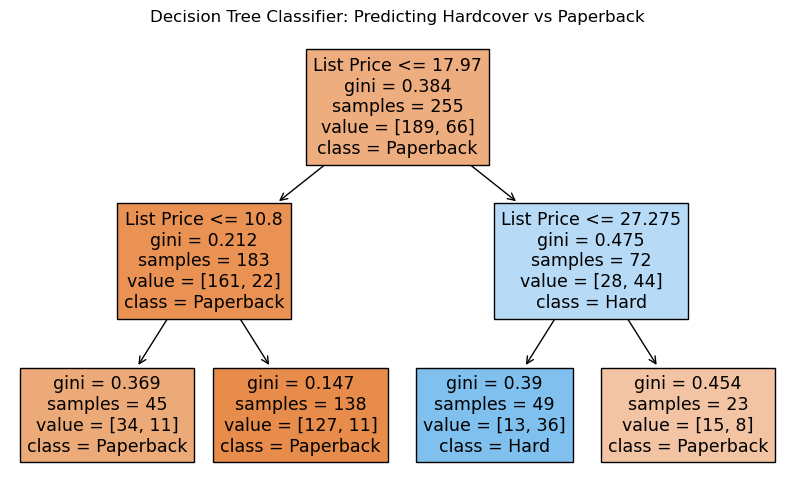

In [2]:
#Question4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path ="https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(file_path, encoding="ISO-8859-1")

# Step 2: Data Preprocessing
# Drop unnecessary columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"], errors="ignore")
# Drop rows with missing values
ab_reduced_noNaN = ab_reduced.dropna()
# Convert data types
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Step 3: Split the dataset into training and testing sets (80/20 split)
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the size of training and test sets
print(f"Training set size: {len(ab_reduced_noNaN_train)} observations")
print(f"Test set size: {len(ab_reduced_noNaN_test)} observations")

# Step 4: Prepare data for Decision Tree
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Target variable: 'H' for Hard Cover
X = ab_reduced_noNaN_train[['List Price']]  # Feature: List Price

# Step 5: Train a Decision Tree Classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Step 6: Visualize the Decision Tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hard'], filled=True)
plt.title("Decision Tree Classifier: Predicting Hardcover vs Paperback")
plt.show()


The summary of question3-4 with the chatbox:Certainly! Here's a summary of our discussion:

1. **80/20 Data Split**:
   - An 80/20 split divides a dataset so that 80% is used for training and 20% for testing or validation.
   - Example: For 1,000 data points, 800 are for training, and 200 are for testing.

2. **Fitting a `DecisionTreeClassifier` in `scikit-learn`**:
   - Steps:
     1. Import necessary libraries.
     2. Prepare your data (`X` for features, `y` for the target).
     3. Split data into training and testing sets.
     4. Initialize and train the model using `DecisionTreeClassifier`.
     5. Evaluate the model using metrics like accuracy.
   - Example code provided to demonstrate these steps.

3. **Interpreting `X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]`**:
   - The `X` variable selects specific columns (`NumPages`, `Thick`, `List Price`) from a cleaned dataset (`ab_reduced_noNaN`) as features for the model.
   - This represents the independent variables used for training.

4. **`max_depth` Parameter**:
   - `max_depth=4` restricts the depth of a decision tree to 4 levels, controlling model complexity.
   - Benefits: Prevents overfitting, improves interpretability, and reduces computational cost.

https://chatgpt.com/share/673f5ed2-b920-800d-bea5-595a58439104

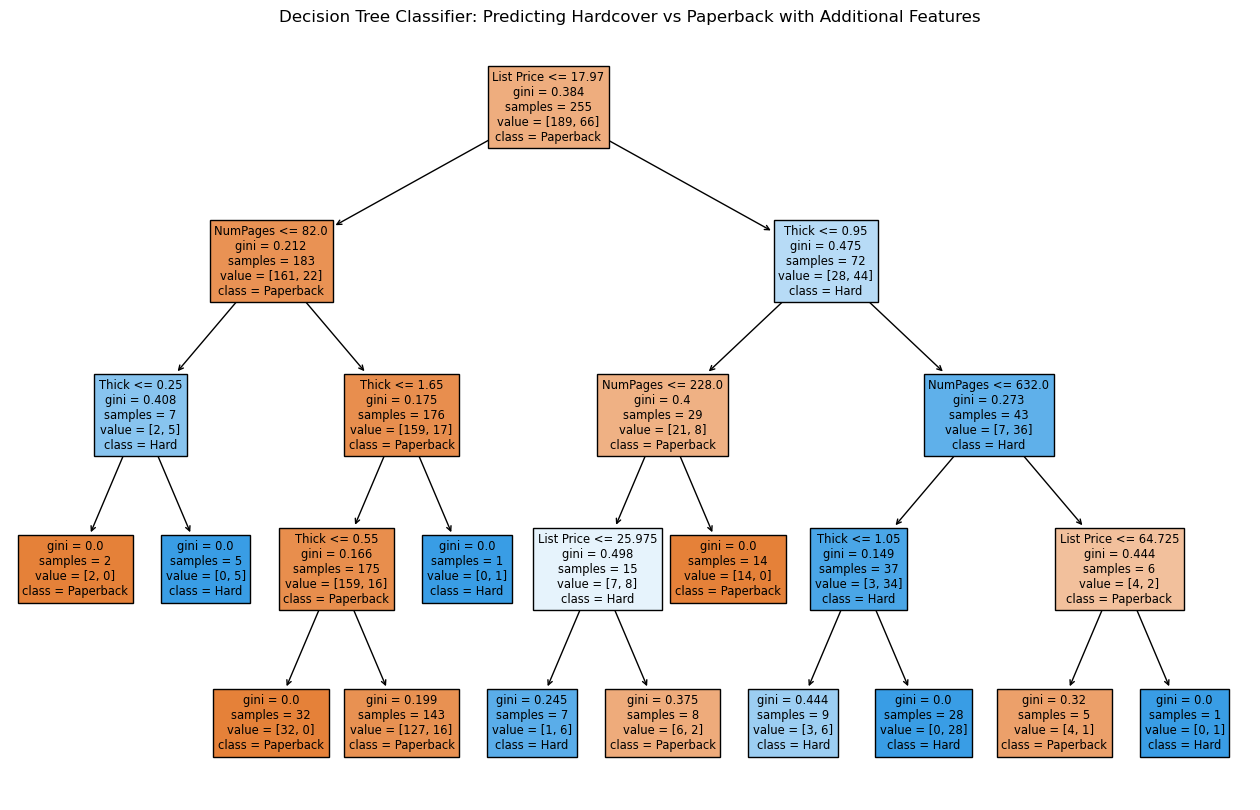

In [3]:
#Question5
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path ="https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(file_path, encoding="ISO-8859-1")

# Step 2: Data Preprocessing
# Drop unnecessary columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"], errors="ignore")
# Drop rows with missing values
ab_reduced_noNaN = ab_reduced.dropna()
# Convert data types
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Step 3: Split the dataset into training and testing sets (80/20 split)
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Step 4: Prepare data for the second Decision Tree
X2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]  # Features: NumPages, Thick, List Price
y2 = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Target variable: 'H' for Hard Cover

# Step 5: Train a Decision Tree Classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X2, y2)

# Step 6: Visualize the Decision Tree
plt.figure(figsize=(16, 10))
tree.plot_tree(
    clf2, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Paperback', 'Hard'], 
    filled=True
)
plt.title("Decision Tree Classifier: Predicting Hardcover vs Paperback with Additional Features")
plt.show()


In [4]:
#Question6
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

# Step 1: Load the dataset
file_path ="https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(file_path, encoding="ISO-8859-1")

# Step 2: Data Preprocessing
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"], errors="ignore")
ab_reduced_noNaN = ab_reduced.dropna()
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Step 3: Split dataset into training and testing sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Step 4: Train the first model (clf)
X_train1 = ab_reduced_noNaN_train[['List Price']]
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train1, y_train)

# Step 5: Train the second model (clf2)
X_train2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train2, y_train)

# Step 6: Prepare test data
X_test1 = ab_reduced_noNaN_test[['List Price']]  # For clf
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # For clf2

# Step 7: Predict using both models
y_pred1 = clf.predict(X_test1)
y_pred2 = clf2.predict(X_test2)

# Step 8: Compute confusion matrices and metrics
conf_matrix_clf = confusion_matrix(y_test, y_pred1)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred2)

# Metrics for clf
accuracy_clf = accuracy_score(y_test, y_pred1)
sensitivity_clf = recall_score(y_test, y_pred1)  # Sensitivity = True Positive Rate
specificity_clf = conf_matrix_clf[0, 0] / (conf_matrix_clf[0, 0] + conf_matrix_clf[0, 1])

# Metrics for clf2
accuracy_clf2 = accuracy_score(y_test, y_pred2)
sensitivity_clf2 = recall_score(y_test, y_pred2)
specificity_clf2 = conf_matrix_clf2[0, 0] / (conf_matrix_clf2[0, 0] + conf_matrix_clf2[0, 1])

# Step 9: Display metrics
metrics = {
    "Model": ["clf", "clf2"],
    "Accuracy": [np.round(accuracy_clf, 3), np.round(accuracy_clf2, 3)],
    "Sensitivity": [np.round(sensitivity_clf, 3), np.round(sensitivity_clf2, 3)],
    "Specificity": [np.round(specificity_clf, 3), np.round(specificity_clf2, 3)]
}

metrics_df = pd.DataFrame(metrics)
print("Model Performance Metrics:")
print(metrics_df)

print("\nConfusion Matrix for clf:")
print(conf_matrix_clf)

print("\nConfusion Matrix for clf2:")
print(conf_matrix_clf2)


Model Performance Metrics:
  Model  Accuracy  Sensitivity  Specificity
0   clf     0.844         0.70        0.909
1  clf2     0.859         0.75        0.909

Confusion Matrix for clf:
[[40  4]
 [ 6 14]]

Confusion Matrix for clf2:
[[40  4]
 [ 5 15]]


### Summary of Interactions https://chatgpt.com/share/673f5a60-1a6c-800d-9d5f-caec2a100203

#### Discussion on "Positive" and "Negative" in Classification
- **Positive**: Refers to the presence of a class of interest, often represented as `1`. For example, predicting a disease in a medical test.
- **Negative**: Refers to the absence of the class, often represented as `0`. For example, predicting no disease in a test.

#### Understanding a Confusion Matrix (Sklearn)
- Discussed the layout and components:
  - **True Positive (TP)**: Correctly identified positives.
  - **True Negative (TN)**: Correctly identified negatives.
  - **False Positive (FP)**: Incorrectly predicted positives.
  - **False Negative (FN)**: Incorrectly predicted negatives.
- Highlighted key metrics:
  - **Accuracy**: Overall correctness.
  - **Precision**: Focus on positive prediction accuracy.
  - **Recall (Sensitivity)**: Ability to identify all actual positives.
  - **F1-Score**: Balance between precision and recall.

#### Comparison of Two Models (`clf` vs. `clf2`)
- Metrics provided:
  - **clf**: Accuracy = 0.844, Sensitivity = 0.70, Specificity = 0.909.
  - **clf2**: Accuracy = 0.859, Sensitivity = 0.75, Specificity = 0.909.
- Observations:
  - **clf2** performs better overall due to higher sensitivity and accuracy.
  - Both models have identical specificity.
- Explanation:
  - Higher sensitivity means `clf2` captures more true positives and reduces false negatives.
  - Model performance differences are not because "clf2 contains more figures," but because it makes fewer classification errors in critical areas.
- Suggested follow-ups:
  - Determine which metric (sensitivity, specificity, or precision) aligns best with the task's goals.
  - Analyze trade-offs or decision thresholds to refine model evaluation.


#Question7

The differences between the confusion matrices for `clf` and `clf2` are primarily due to the number of features they use. `clf` relies only on the `List Price` feature for prediction, which limits the information it can capture about the target variable \( y \), resulting in weaker model performance. In contrast, `clf2` incorporates additional features, such as `NumPages` and `Thick`, which are likely more strongly correlated with \( y \), enabling the model to better capture patterns in \( y \).

With richer features, `clf2` can understand the characteristics of the data more comprehensively, leading to improved classification performance and a lower misclassification rate. From the confusion matrices, it’s clear that using more relevant features significantly enhances the model’s predictive accuracy, which is why `clf2` performs better.

Here is a summary of our exchanges:https://chatgpt.com/share/673f5bde-9388-800d-9693-2a34ecbc05a3

---

**Discussion Topic: Comparing Two Confusion Matrices in Classification**
1. **Initial Question:** You asked about the differences between two confusion matrices:
   - **First Matrix:** Predictions made using the `'List Price'` feature.
   - **Second Matrix:** Predictions made using three features: `'NumPages'`, `'Thick'`, and `'List Price'`.

2. **Explanation of Differences:**  
   I explained that the differences arise because the second model uses additional features, which likely provide more information for the classifier. These extra features can help the model better distinguish between classes, potentially improving accuracy and altering the confusion matrix outcomes (true positives, false positives, true negatives, and false negatives).

3. **Reason for Better Scores with Additional Features:**  
   You sought clarification on whether the inclusion of more features improves scores. I confirmed that adding more relevant features generally enhances the model's ability to make accurate predictions by providing it with a more comprehensive understanding of the data. I also highlighted potential risks, such as overfitting and the need for features to be relevant and non-redundant.

4. **Final Summary:**  
   Adding `'NumPages'` and `'Thick'` to `'List Price'` should improve the model's predictive performance if the new features provide meaningful and unique information. The improvement will likely manifest as a higher accuracy score or other performance metrics and fewer misclassifications in the confusion matrix.


The most important predictor variable is: List Price


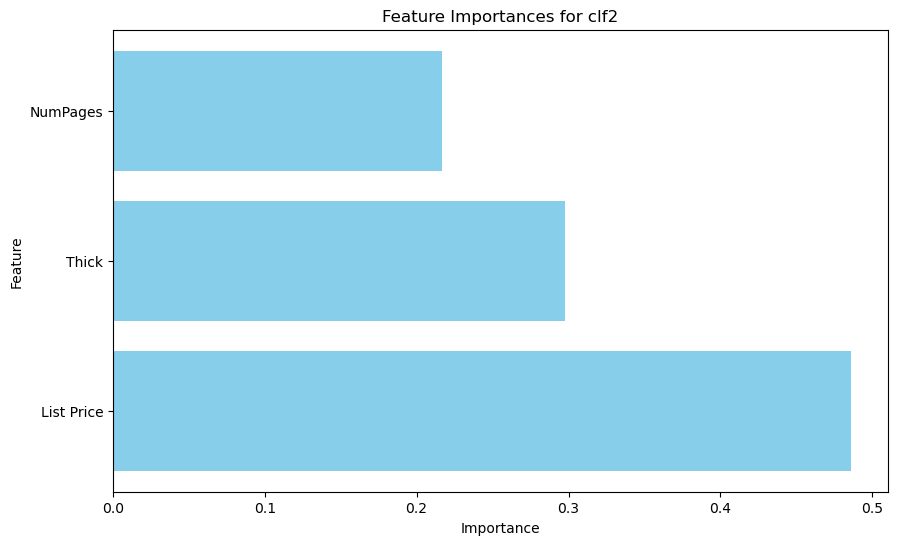

In [6]:
#Question8
import matplotlib.pyplot as plt
import numpy as np

# Assuming clf2 is already trained and available
# Get feature importances and corresponding feature names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Find the most important feature
most_important_feature_idx = np.argmax(feature_importances)
most_important_feature = feature_names[most_important_feature_idx]
print(f"The most important predictor variable is: {most_important_feature}")

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for clf2')
plt.gca().invert_yaxis()  # Optional: flip for better visualization
plt.show()


#Question9:
In linear regression, coefficients represent how much the predicted outcome changes when a predictor variable increases by one unit (assuming other variables stay the same), so it’s easier to understand. In decision trees, feature importance measures how much each variable contributes to the model by reducing impurity (like the Gini coefficient) at split nodes, but it doesn’t directly show how predictions change. Overall, linear regression is more straightforward to interpret, while feature importance in decision trees is a bit more abstract.

#question9 summary with the chatbox:
Here’s a summary of our discussion:

- **Linear Regression Coefficients**: They measure how much the dependent variable changes with a one-unit increase in an independent variable, assuming all other variables remain constant. They directly represent the strength and direction of relationships between variables.

- **Feature Importance in Decision Trees**: These indicate how much each feature contributes to reducing prediction errors (e.g., Gini impurity or variance) in the tree model. Decision trees work through a series of splits, making decisions step-by-step, and feature importance reflects the role of variables in these splits, not direct relationships.

Key difference: Regression coefficients quantify the direct influence, while tree feature importance reflects how helpful variables are in improving prediction accuracy through hierarchical splits.

#Question10:YES